In [15]:
## Bring in needed mods
import pandas as pd, numpy as np

## Load in matplot lib
from matplotlib import pyplot as plt

## Set random seed
np.random.seed(711)

In [16]:
## Load in sims
import mystatslib as sims

## Load in mod
import epigenomevisulization as epv

In [17]:
## Set path to input atacseq data
atacseq_path = '../DATA/BEDS/ENCODE.Ceil.genomic.10000.counts.bed.gz'

## Load in the dataframe 
atacseq = epv.loaddf(atacseq_path)

## Iterate thru the list of samples, starting from 4th column over 
for c in atacseq.columns[3:].tolist():
    
    ## Gather a new name 
    bamname = c.split('.')[1]
    
    ## Rename
    atacseq[bamname] = atacseq[c]
    
    ## Drop old
    atacseq.drop(c,axis=1,inplace=True)
    
## View the head
atacseq.head()

,Chrom,Left,Right,ENCLB404SKN,ENCLB324GIU,ENCLB584REF,ENCLB758GEG,ENCLB605LCC,ENCLB293SLX,ENCLB907YRF,ENCLB918NXF,ENCLB817BKI,ENCLB734LAL,ENCLB432QLN,ENCLB621FEI,ENCLB074EQT,ENCLB984XHJ,ENCLB937FOM,ENCLB715JYV
0,chr1,1,10000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,chr1,10001,20000,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,chr1,20001,30000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,chr1,30001,40000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,chr1,40001,50000,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [18]:
## Load in infro for supplementary table 1
info = pd.read_csv('../TABLES/S.table.1.csv')

## Gather the encode numbers 
info = info[(info.Source!='This study')][['Cell Line','Replicate Name']]

## Make into a cell dictionary 
celldict = dict(zip(info['Replicate Name'].values,info['Cell Line']))

## Show the tail 
info.tail()

,Cell Line,Replicate Name
19,RWPE2,ENCLB293SLX
20,RWPE2,ENCLB734LAL
21,RWPE2,ENCLB984XHJ
22,WTC11,ENCLB621FEI
23,WTC11,ENCLB715JYV


In [23]:
totest_cols = ['Chrom','Left','Right']+info[(info['Cell Line'].isin(['GM12878','A549']))]['Replicate Name'].tolist()

In [25]:
atacseq[totest_cols].to_csv(,compression='gzip',index=False,sep='\t')

In [26]:
## Gather the smaples 
samples = epv.getsamples(atacseq)

## Print the first 5 names 
samples[:5]

['ENCLB404SKN', 'ENCLB324GIU', 'ENCLB584REF', 'ENCLB758GEG', 'ENCLB605LCC']

In [6]:
## Show the change in norm. mutual. info.
x,y = atacseq[samples[0]].values,atacseq[samples[1]].values

## Print the values 
sims.conmi(x,y,cozero=False), sims.conmi(x,y,cozero=True)

(0.5479701305587117, 0.24105536924298013)

In [7]:
## Show the change in R2
sims.copearson(x,y,cozero=False)**2, sims.copearson(x,y,cozero=True)**2

(0.5044831997490731, 0.23979769564723463)

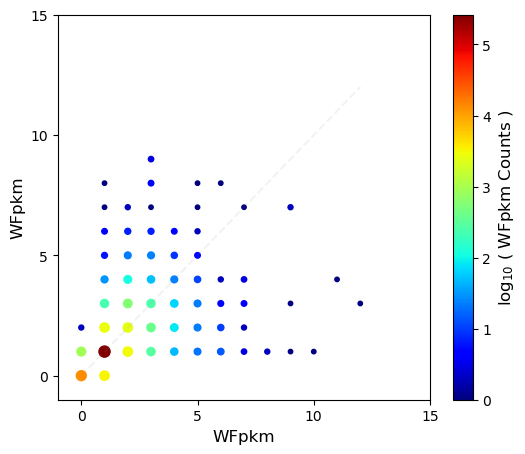

In [8]:
## Plot a comet plot
epv.cometplot(x,y);

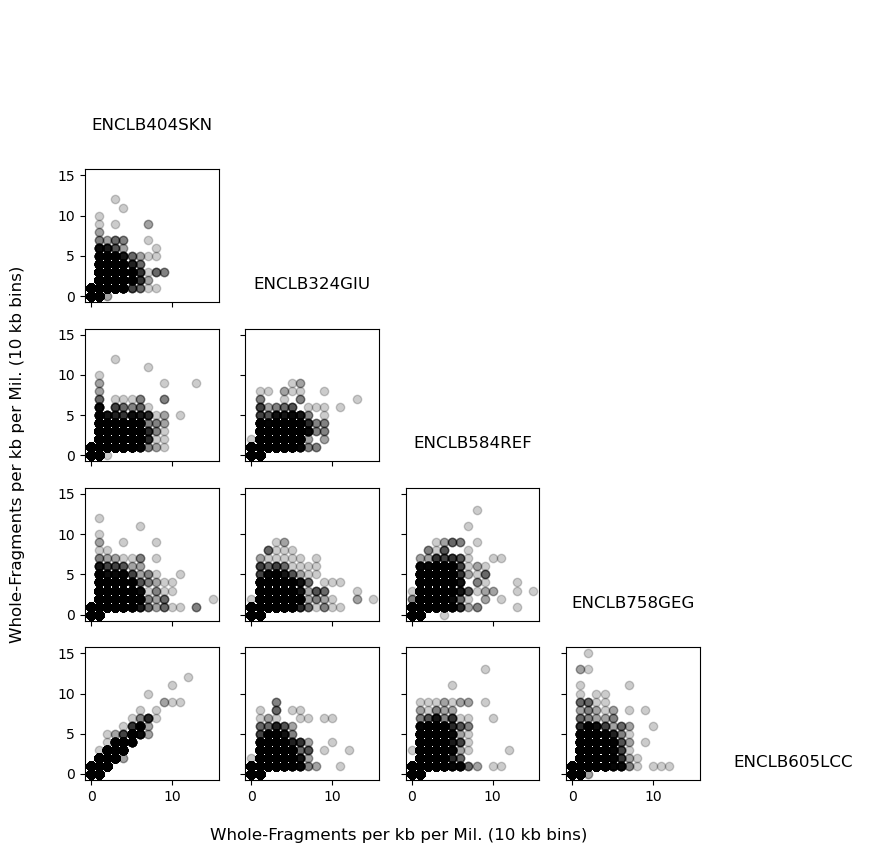

In [10]:
## Plot a corr grid of the bi-variate scatter plots 
f,a = epv.corrgrid(atacseq,samples[:5],xy=None)

In [11]:
## Initilize result
results = []

## Iterate thru the samples 
for i,si in enumerate(samples):
    for j,sj in enumerate(samples):
        
        ## If the row is larger than column 
        if i > j:
            ## Switch between true and false in co-zero removal 
            for cz in (True,False):
                ## Gather the x and y 
                x,y = atacseq[si].values,atacseq[sj].values
                
                ## Calculate pearson's R, R2, nmi, and spearman
                pr = sims.copearson(x,y,cozero=cz)
                r2 = pr**2
                mi = sims.conmi(x,y,cozero=cz)
                sp = sims.cospearman(x,y,cozero=cz)
                
                ## Determin if these are replicates
                isrep = (celldict[si] == celldict[sj])
                
                ## Append the results
                results.append((si,sj,cz,isrep,pr,r2,mi,sp))

## Make results into a dataframe
results = pd.DataFrame(results,columns=['Sample1','Sample2','Cozero','Isrep','PearsonR','Rsquared','NMI','Spearman'])
            
## Show head
results.head()

,Sample1,Sample2,Cozero,Isrep,PearsonR,Rsquared,NMI,Spearman
0,ENCLB324GIU,ENCLB404SKN,True,False,0.489691,0.239798,0.241055,0.443400
1,ENCLB324GIU,ENCLB404SKN,False,False,0.710270,0.504483,0.547970,0.767056
2,ENCLB584REF,ENCLB404SKN,True,False,0.516603,0.266878,0.198366,0.413057
3,ENCLB584REF,ENCLB404SKN,False,False,0.663394,0.440091,0.481283,0.717035
4,ENCLB584REF,ENCLB324GIU,True,False,0.576110,0.331902,0.236399,0.455562


In [12]:
## Set the order of the statistics to plot 
stats = ['Spearman','PearsonR','Rsquared','NMI']

## Set the stat lables, make sure the match above 
stat_labels = ['Spearman '+ '\u03C1', 'Pearson $R$', '$R^2$','Normalized Mutual Information']

## Form into a dictionary
stat_label_dict = dict(zip(stats,stat_labels))

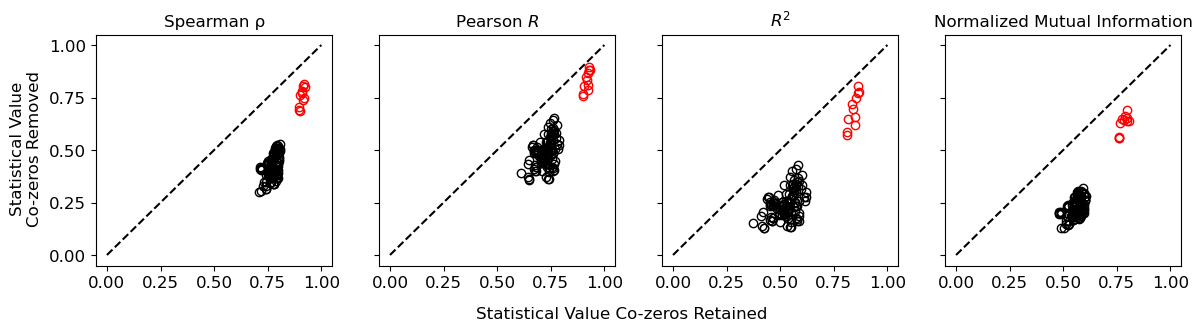

In [13]:
## Set the subplots, equal axis, with white axis 
fig,ax = plt.subplots(1,4,figsize=(14,3),sharex=True,sharey=True)
fig.set_facecolor('w')

for i,s in enumerate(stats):
    ## Set the axis 
    plt.sca(ax[i])
    
    ## Set the title
    plt.title(stat_label_dict[s],fontsize=12)
    
    ## Plot a one to one line
    plt.plot([0,1],[0,1],'k--')
    
    ## Iterate thru rep vs no-rep
    for b in (True,False):
        ## Gather the x and y 
        x = results[(results.Cozero==False) & (results.Isrep==b)][s].values
        y = results[(results.Cozero==True)  & (results.Isrep==b)][s].values
    
        ## Plot the results 
        plt.plot(x,y,'o',fillstyle='none',color='r' if b else 'k')
    
    ## Reset the x and y ticks
    plt.xticks(np.arange(0,1.25,0.25),fontsize=12)
    plt.yticks(np.arange(0,1.25,0.25),fontsize=12)
    
## Annotate the x and y axis 
fig.text(x=0.075,y=0.5,s='Statistical Value\nCo-zeros Removed',fontsize=12,rotation=90,va='center',ha='center');
fig.text(x=0.5,y=-0.05,s='Statistical Value Co-zeros Retained',fontsize=12,rotation=0,va='center',ha='center');

In [14]:
## Save out the data
results.to_csv('../DATA/ATAC-seq_stats.csv',index=False)